In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('googleplaystore.csv')

In [5]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [7]:
df.shape

(10841, 13)

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

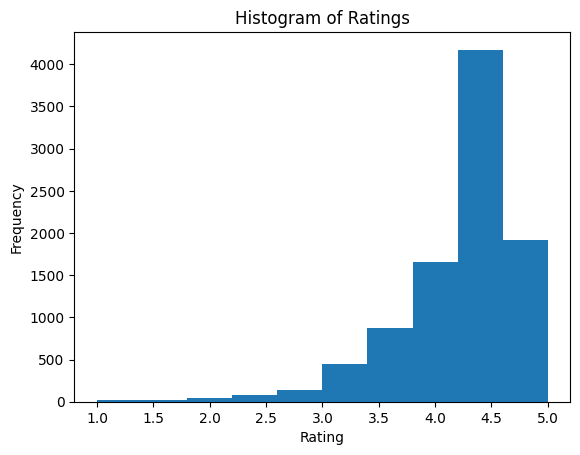

In [15]:
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

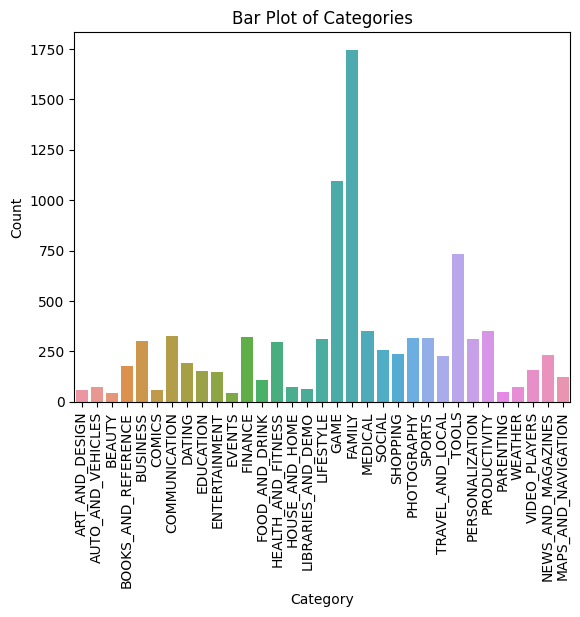

In [16]:
sns.countplot(x='Category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.xticks(rotation=90)
plt.show()

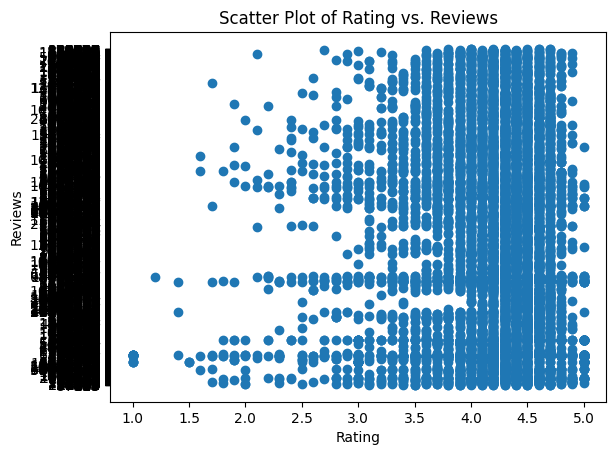

In [18]:
plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Rating vs. Reviews')
plt.show()


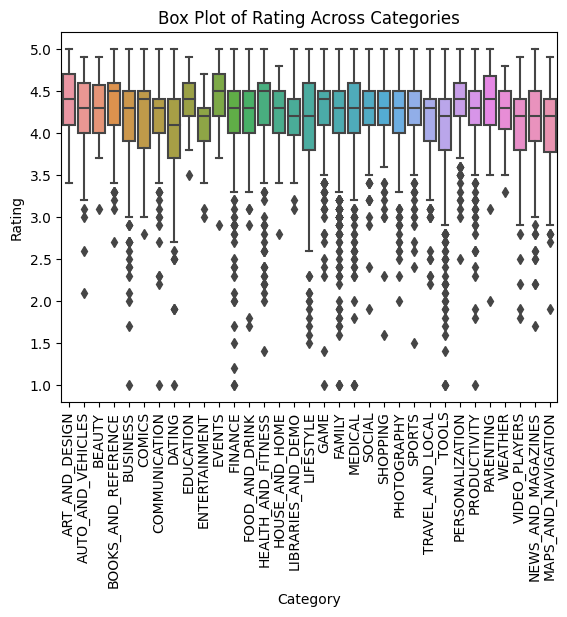

In [19]:
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot of Rating Across Categories')
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-7ac8aa6aeacc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


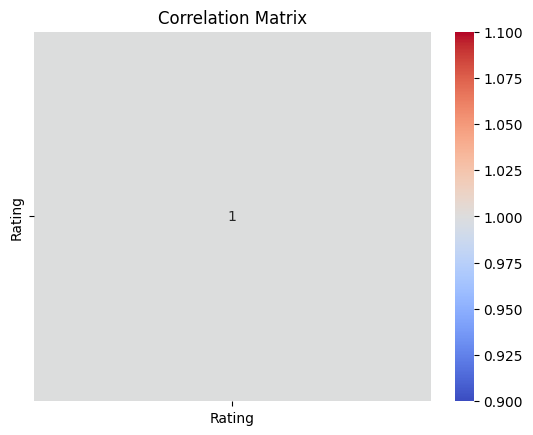

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

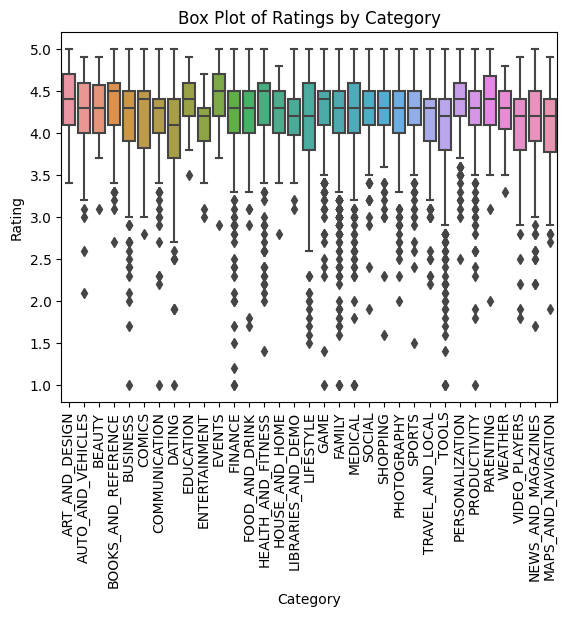

In [21]:
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Category')
plt.xticks(rotation=90)
plt.show()

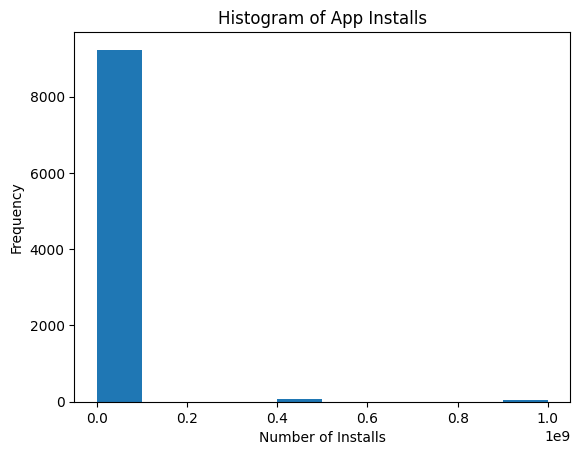

In [22]:
# Convert the 'Installs' column to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '').replace('+', '') if ',' in x or '+' in x else x).astype(int)

# Plot a histogram of the number of app installs
plt.hist(df['Installs'], bins=10)
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.title('Histogram of App Installs')
plt.show()

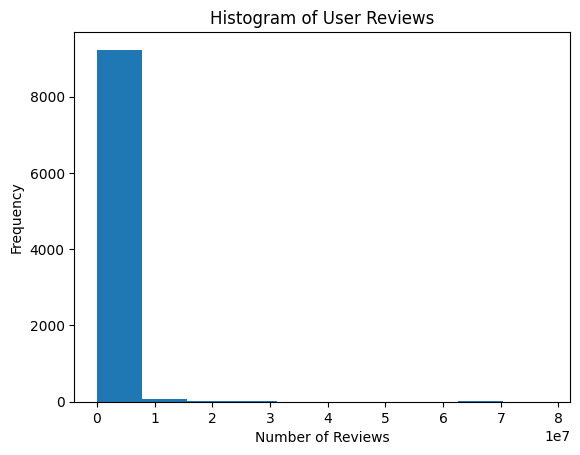

In [23]:
df['Reviews'] = df['Reviews'].astype(int)

# Plot a histogram of the number of reviews
plt.hist(df['Reviews'], bins=10)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of User Reviews')
plt.show()

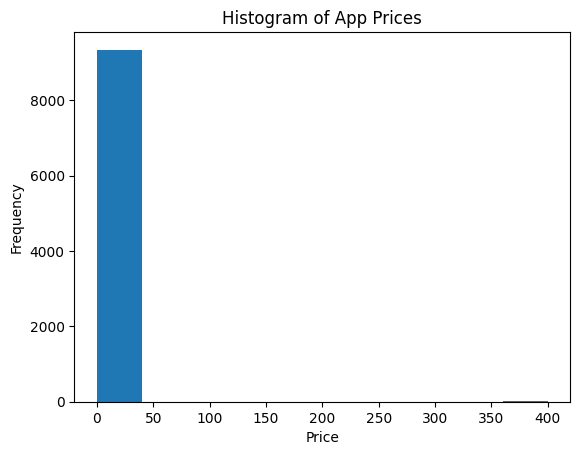

In [24]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x).astype(float)

# Plot a histogram of app prices
plt.hist(df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of App Prices')
plt.show()

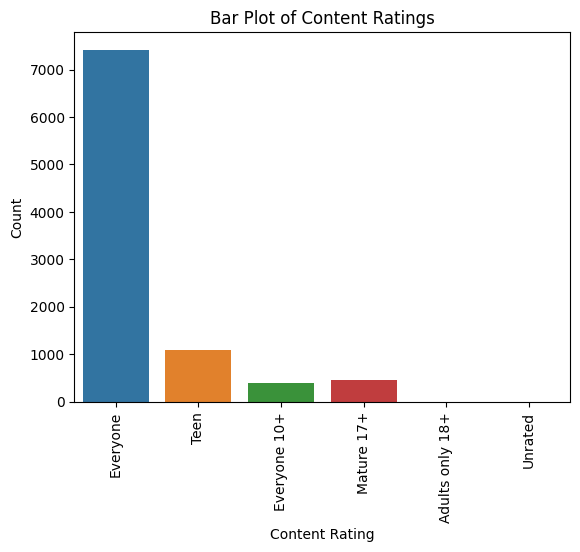

In [25]:
sns.countplot(x='Content Rating', data=df)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Bar Plot of Content Ratings')
plt.xticks(rotation=90)
plt.show()

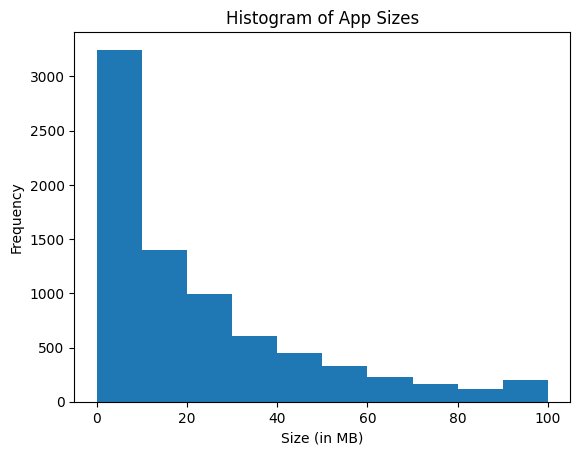

In [26]:
# Convert 'Size' column to numeric (remove 'M' or 'k' suffix and handle 'Varies with device')
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '') if 'M' in x else x)
df['Size'] = df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in x else x)
df['Size'] = df['Size'].replace('Varies with device', np.nan).astype(float)

# Plot a histogram of app sizes
plt.hist(df['Size'].dropna(), bins=10)
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.title('Histogram of App Sizes')
plt.show()